# **Handbook**


## Computation and Technical Section

### $\underline{Ridge \  Regression}$ 


For the ridge regression, we will use the Boston dataset taken from scikit-learn library. The information refers to the housing dataset from sample data, as well as some basic statistics about them. \\
The dataset is not very big, but its complexity derives from its enormous multicollinearity to predict the median house value.


In [1]:
# Importing Basic Lbraries and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import math

# Importing Libraries for ridge regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
# Basic information about dataframe
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Checking numbers of unique value for each column
df.nunique(axis=0, dropna=True)

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
# Checking Null Value for each column
print(df.isnull().sum(),df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity  

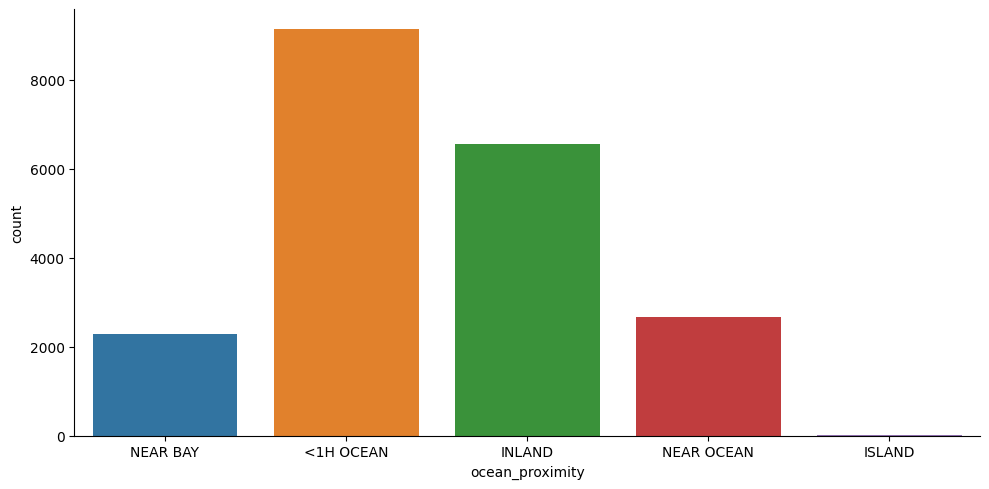

In [7]:
# Based on the unique numbers, only 'ocean_proximity' is classification while others are numeric.
# To be more certain,
sns.catplot(data = df, x='ocean_proximity', kind = 'count', aspect =2);

With this plot, we can encode 'ocean_proximity' into numeric depending on the quantities of count.

In [8]:
from sklearn.preprocessing import LabelEncoder # To differentiate the different influences
le = LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


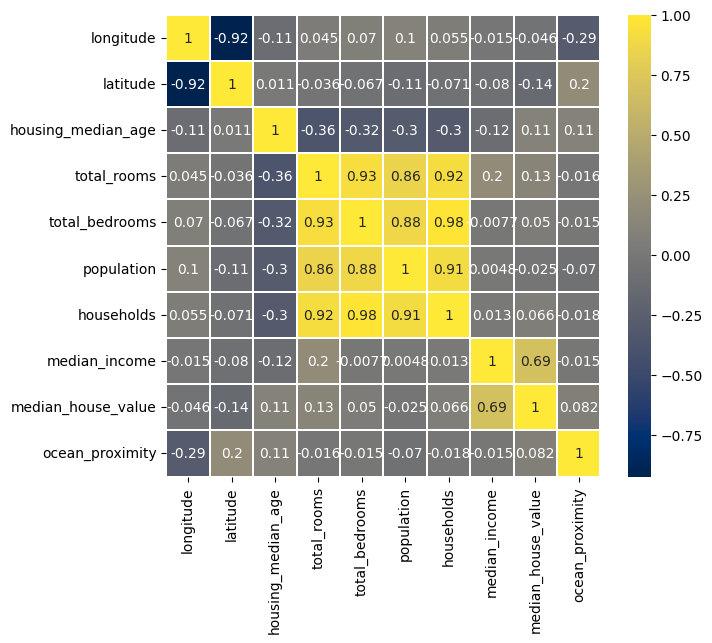

In [9]:
# We will perform correlation matrix
corr_mat = df.corr() 
f, ax = plt.subplots(figsize =(7,6)) 
sns.heatmap(corr_mat,annot=True, cmap ="cividis", linewidths = 0.1);

In [10]:
# We will now filling the missing value (null) with the median value
df['total_bedrooms'] = df['total_bedrooms'].fillna((df['total_bedrooms'].median()))

# Checking the null value again
df.isnull().sum()

if (df.isnull().sum().sum()) == 0:
    print("There is no more null values available in the dataset.")
else:
    print("WRONG!")

There is no more null values available in the dataset.


In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


After making sure that there is no more null values, we will initiate the ridge regression by defining features and target variables.

In [12]:
# Defiing features and target
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

# Spliting the dataset into train(75%) and test(25%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

# Model Prediction
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
r2_fit= r2_score(y_test,y_pred)
print("r2scores : ",r2_fit)
ridge.score(X_train,y_train),ridge.score(X_test,y_test)
print(ridge.intercept_)

r2scores :  0.643693305068086
-3573489.60351222


We can find that the intercept_ term is quite large, meaning the model is still underfit though r2 score is 64.35%. In order to improve the model, we will consider trimming some high correlation features and scaling the range.

Before scaling the data, we will run cross-validation on current train and test dataset.

In [13]:
# To get more robust
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Now we will consider finding the appropriate alpha value by using RidgeCV
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# define search
search = GridSearchCV(ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
X = df.drop(['median_house_value','total_rooms'],axis=1)
y = df['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -51221.171
Config: {'alpha': 0.99}


The generated results suggest it is necessary to perform scaling.

In [14]:
# Scaling the data using MinMaxScaler
x = df.columns
from sklearn.preprocessing import MinMaxScaler
mMs = MinMaxScaler()
for i in x:
    df[i] = pd.DataFrame(mMs.fit_transform(pd.DataFrame(df[i])))

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.75,0.043512
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.75,0.038224
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.75,0.052756
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.75,0.035241
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.75,0.038534


In [15]:
# Again we will try to run cross-validation on the rescaled data.
# define grid
grid1 = dict()
grid1['alpha'] = np.arange(0, 0.2, 0.005)

# define search
search1 = GridSearchCV(ridge, grid1, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
X = df.drop(['median_house_value','total_rooms'],axis=1)
y = df['median_house_value']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)
results = search1.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.106
Config: {'alpha': 0.0}


Now, we can see that there is a significant improvement on MAE and the value of alpha suggest that the model performs almost identical to linear regression without having much regularization parameters.

In [16]:
# We will now find the metrics of the updated ridge model
rr = Ridge(alpha=0.001) # not much alpha value
rr.fit(X_train, y_train) 

y_pred = rr.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
rid_score = np.sqrt(MSE)
r2_fit = r2_score(y_test, y_pred)

print("Mean-squared Error : ", MSE.round(5))
print("Root Mean-Squared Error : ", rid_score.round(5))
print("R2 Scores : ", r2_fit.round(5))

Mean-squared Error :  0.0201
Root Mean-Squared Error :  0.14178
R2 Scores :  0.6425


Although, Ridge Regression was performed for this example, there can be other methods that are more suitable to use.

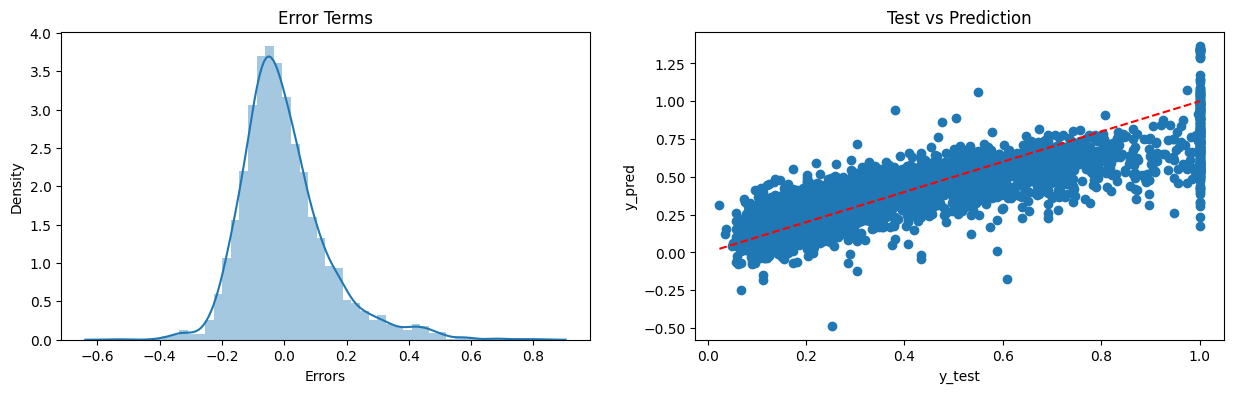

In [17]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot(y_test - y_pred)
plt.title('Error Terms')          
plt.xlabel('Errors')

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()

In [18]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"] = X_train.columns
ridge_coefficient["Coefficient Estimate"] = pd.Series(rr.coef_)
print(ridge_coefficient)

               Columns  Coefficient Estimate
0            longitude             -0.934351
1             latitude             -0.876958
2   housing_median_age              0.130293
3       total_bedrooms              0.585480
4           population             -3.060818
5           households              1.136978
6        median_income              1.112057
7      ocean_proximity             -0.004363
8  rooms_per_household              0.522678


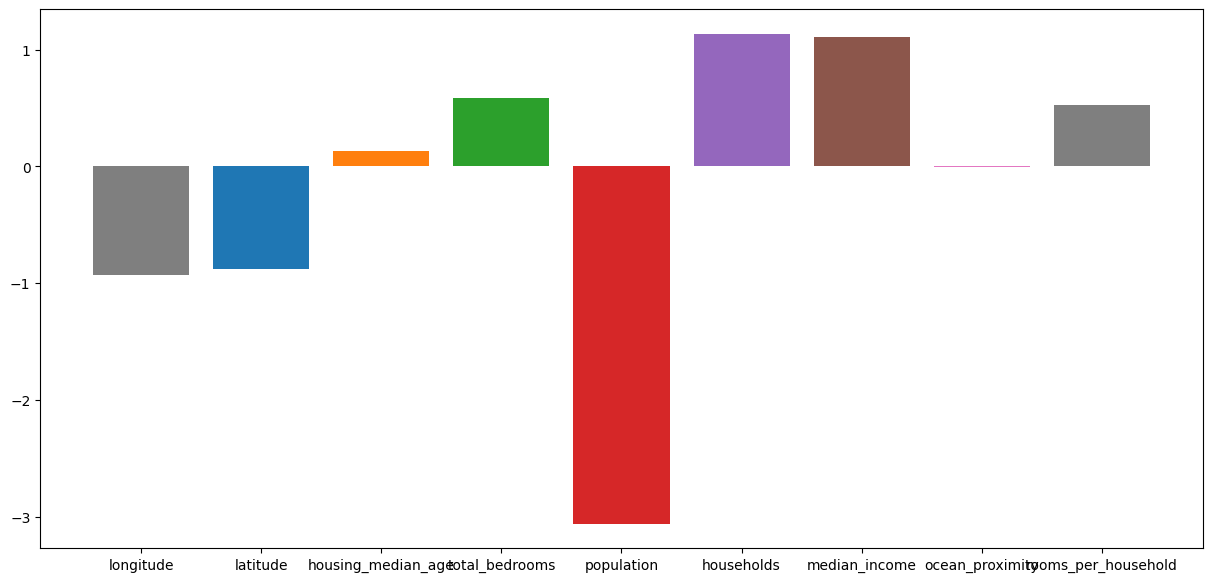

In [19]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(15, 7))

color = [
    "tab:gray",
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
    "tab:orange",
    "tab:green",
    "tab:blue",
    "tab:olive",
]

ax.bar(
    ridge_coefficient["Columns"], ridge_coefficient["Coefficient Estimate"], color=color
)

plt.style.use("ggplot")
plt.show()

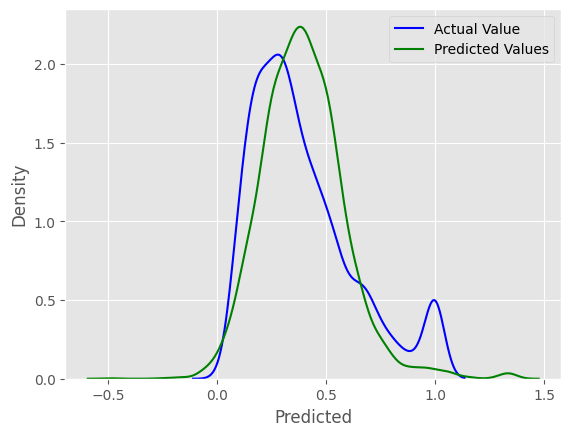

In [20]:
dfplot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
ax1 = sns.distplot(dfplot['Actual'], hist=False, color="blue", label="Actual Value")
sns.distplot(dfplot['Predicted'], hist=False, color="green", label="Predicted Values" , ax=ax1)
plt.legend();

### $\underline{Classification \  Tree}$ 

Information about the input dataset - Predict whether income exceeds $50K/yr based on census data

The dataset used is US Census data which is an extraction of the 1994 census data which was donated to the UC Irvine’s Machine Learning Repository. The data contains approximately 32,000 observations with over 15 variables. The dependent variable in our analysis will be income level and who earns above $50,000 a year

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
# Load the loan data
colnames=['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target'] 


In [23]:
from google.colab import files
uploaded = files.upload()

Saving Adult Data.csv to Adult Data.csv


In [24]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Adult Data.csv']), names=colnames, header=None, index_col=False)
# Dataset is now stored in a Pandas Dataframe

data['target'] = np.where(data.target == ' <=50K', 0, 1)

In [25]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [26]:
data.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [27]:
#select 4 features for demonstration
features = ['age','education_num','sex','hours_per_week']
all_ft = features + ['target']
df = data[all_ft]

In [28]:
print([column for column in df.columns if df[column].dtype == object])

['sex']


In [29]:
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [30]:
# convert categorical
df['sex'] = np.where(df['sex'] == ' Male', 1, 0)

In [31]:
# Select the features and target variable
X = df.drop(['target'], axis=1)
y = df['target']

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Create a decision tree classifier object
clf = DecisionTreeClassifier(criterion="log_loss", max_depth=3,min_samples_split=5, min_samples_leaf= 5)

In [33]:
# Predict the classes of the test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

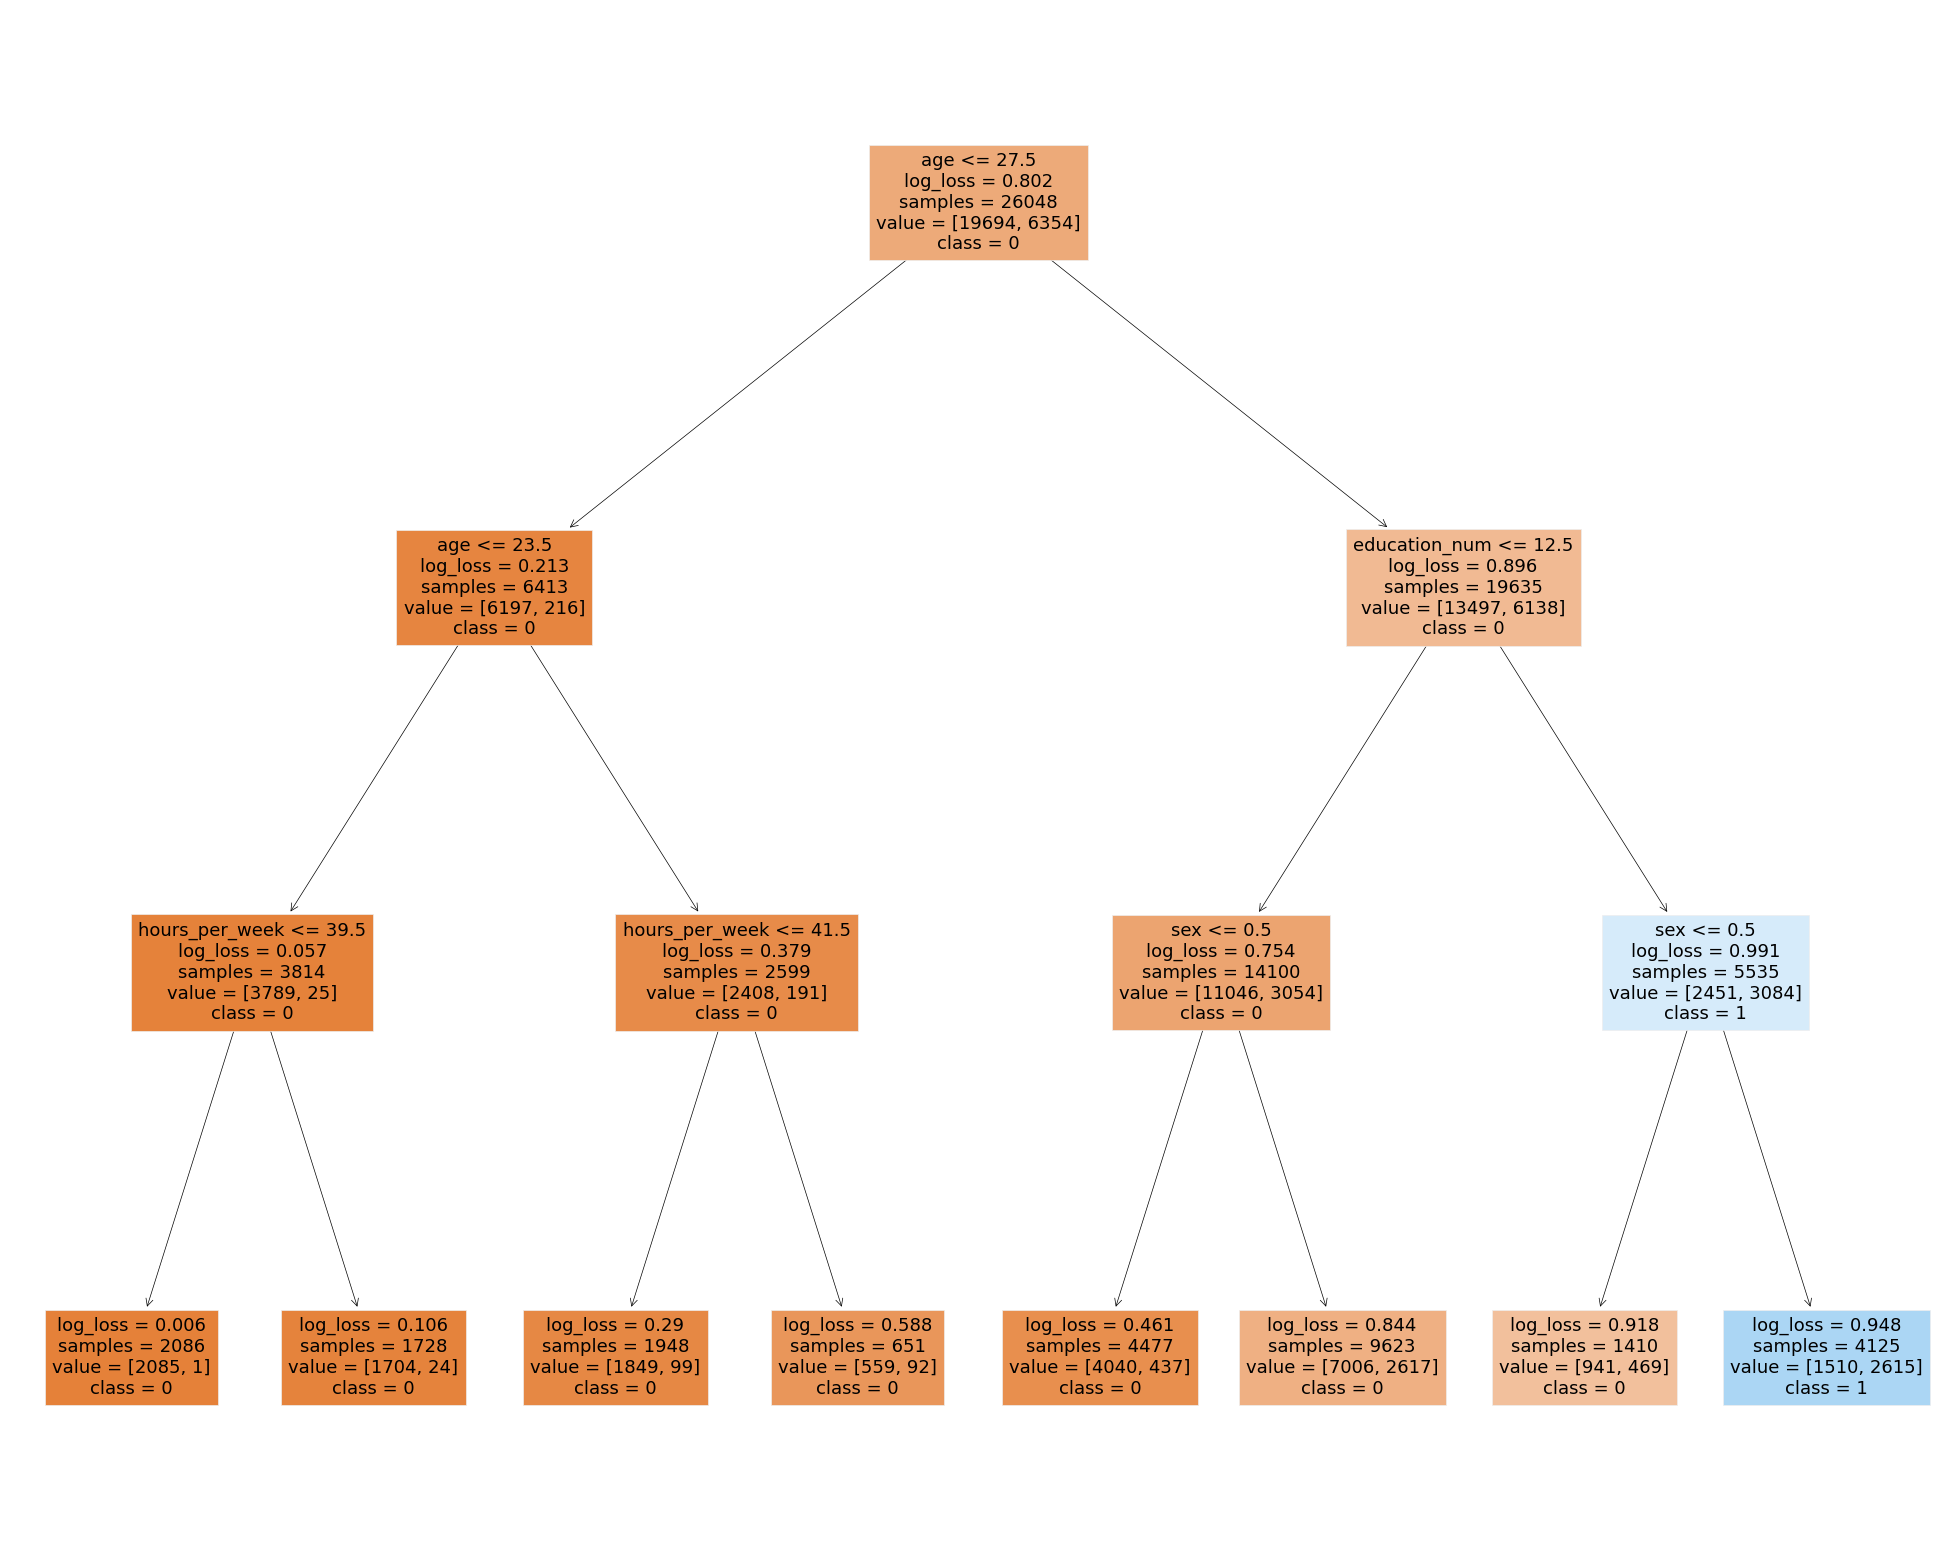

In [34]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, feature_names=features, class_names=['0','1'], filled=True)

In [35]:
# Obtain the probabilities
probs_tmp = clf.predict_proba(X_test)

probs = probs_tmp[:, 1]

No Skill: ROC AUC=0.500
Clasifier: ROC AUC=0.793


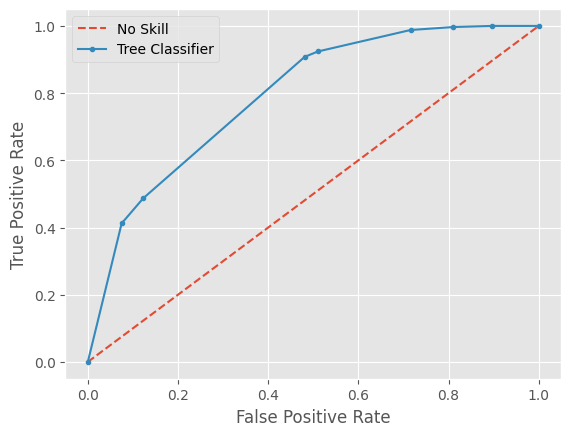

In [36]:
# plot the roc curve for the model
# generate a no skill or random guess prediction and calculate roc curves for tree and no skill

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
fpr, tpr, _ = roc_curve(y_test, probs)

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)  # random guess
tree_auc = roc_auc_score(y_test, probs)  # tree classifier

# summarize scores
print("No Skill: ROC AUC=%.3f" % (ns_auc))
print("Clasifier: ROC AUC=%.3f" % (tree_auc))

plt.plot(ns_fpr, ns_tpr, linestyle="--", label="No Skill")
plt.plot(fpr, tpr, marker=".", label="Tree Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### $\underline{K-means \  Clustering}$ 

In [37]:
# Exploring the library and simple use
from sklearn.cluster import KMeans

# generate random data
xample = 10*np.random.rand(100,2)

# create kmeans object
kmeans = KMeans(n_clusters=3)

# fit kmeans object to data
kmeans.fit(xample)

# print location of clusters learned by kmeans object
print("location of clusters learnd by k-means object", kmeans.cluster_centers_)

location of clusters learnd by k-means object [[8.01151993 7.48423374]
 [5.55720793 2.24632785]
 [2.16006763 7.46180021]]


We will take the dataset from Github about Mall Customers and make k-means clustering to find the similarity between datapoints.

In [38]:
url_km = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
df_km = pd.read_csv(url_km, sep = ",")
df_km

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
# Basic EDA
display(df_km.info(), df_km.describe(), df_km.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
# For easy visualization, we will use 'Spending_Score' and 'income' variable and drop any duplicates.
newdf_km = df_km.copy()

newdf_km.drop_duplicates(inplace=True)
Xv = newdf_km.iloc[:, [2, 3]].values

In order to run the K-means clustering, we will need to deterine the value of K. This can be determine by using elbow method.

In [41]:
# Using the elbow method to find the optimal K
from sklearn.cluster import KMeans as KM
wcss = []
for i in range(1, 11):
    k_means = KM(n_clusters = i, init = 'k-means++', random_state = 1)
    k_means.fit(Xv)
    # inertia method returns wcss for that model
    wcss.append(k_means.inertia_)

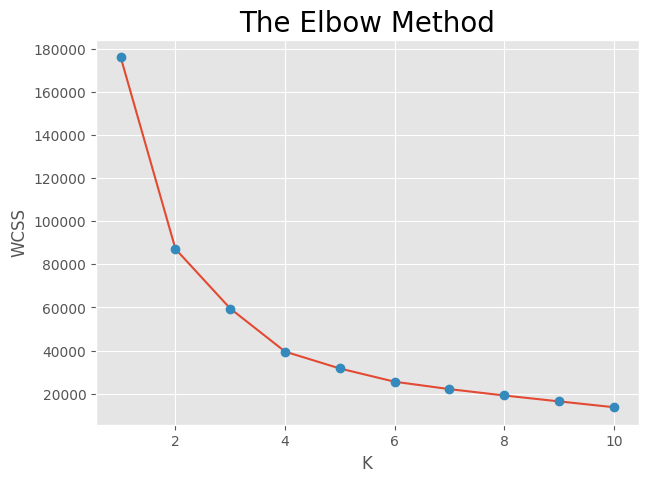

In [42]:
plt.rcParams["figure.figsize"] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, 'o')
plt.title("The Elbow Method", fontsize=20)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show();

We find that after k = 5, the slope becomes smooth.
Thus we will use k = 5 to visualize the clustering.

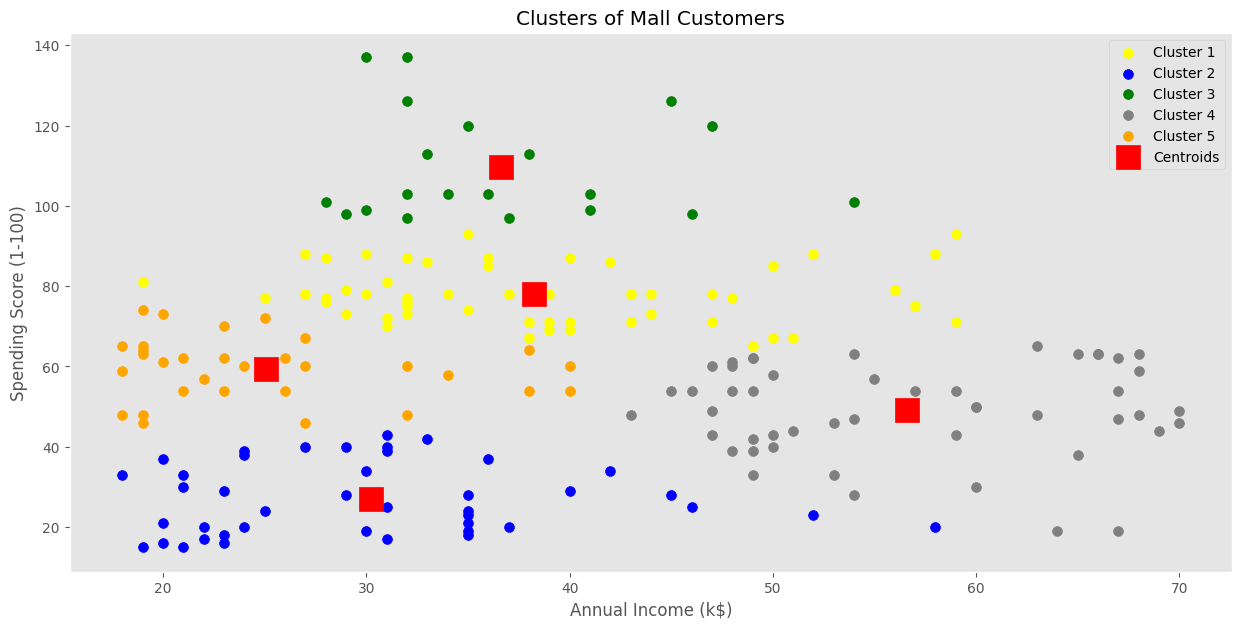

In [43]:
# k = 5
k_means = KM(n_clusters = 5, init = 'k-means++', random_state = 1)
y_kmeans = k_means.fit_predict(Xv)

# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(Xv[y_kmeans == 0, 0], Xv[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
plt.scatter(Xv[y_kmeans == 1, 0], Xv[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
plt.scatter(Xv[y_kmeans == 2, 0], Xv[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
plt.scatter(Xv[y_kmeans == 3, 0], Xv[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
plt.scatter(Xv[y_kmeans == 4, 0], Xv[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();